### Machine Learning Analysis

Feature columns: ['ETFOSE', 'MEFOSE', 'PFHXDA', 'ETFOSA', 'MEFOSA', 'PFUNDCA', 'PFDOA', 'PFNS', 'NMEFOSAA', 'NETFOSAA', 'total_pfas_concentration', 'Cancer_Incidents', 'PopTot', 'Sex_Male', 'Cancer_Breast', 'Cancer_CRC', 'Cancer_Kidney', 'Cancer_Liver', 'Cancer_Lung', 'Cancer_Lymph', 'Cancer_Mela', 'Cancer_Pancreas', 'Cancer_Prostate', 'Cancer_Thyroid', 'Cancer_Urinary', 'Cancer_Uterine', 'AAIR_Label']

🔍 Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25075
           1       1.00      1.00      1.00      5057

    accuracy                           1.00     30132
   macro avg       1.00      1.00      1.00     30132
weighted avg       1.00      1.00      1.00     30132



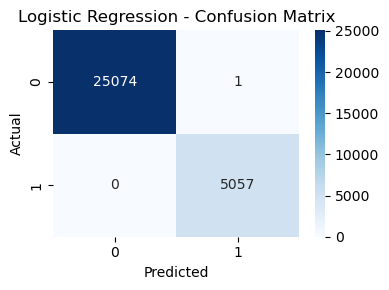


🔍 Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25075
           1       1.00      1.00      1.00      5057

    accuracy                           1.00     30132
   macro avg       1.00      1.00      1.00     30132
weighted avg       1.00      1.00      1.00     30132



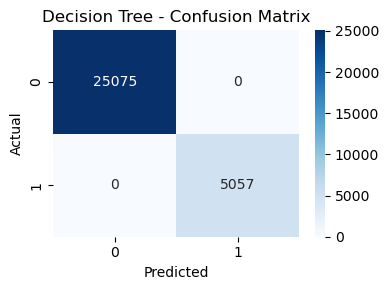


🔍 SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25075
           1       1.00      1.00      1.00      5057

    accuracy                           1.00     30132
   macro avg       1.00      1.00      1.00     30132
weighted avg       1.00      1.00      1.00     30132



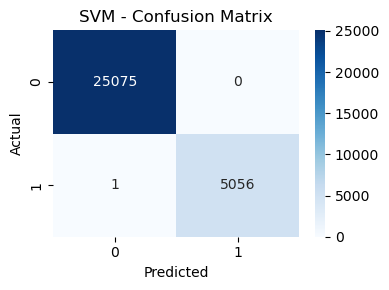

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("reduced_pfas_dataset.csv")

# Create binary target: 1 = above average AAIR, 0 = below
threshold = df['AAIR'].mean()
df['aair_class'] = (df['AAIR'] > threshold).astype(int)

# Define features 
feature_cols = [col for col in df.columns if col not in ['AAIR', 'aair_class', 'county', 'gm_samp_collection_date', 'Cancer', 'Sex']]
print(f"Feature columns: {feature_cols}")
X = df[feature_cols]
y = df['aair_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

for name, model in models.items():
    print(f"\n🔍 {name}")
    if name == 'SVM':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()